In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch

from transformers import AutoModelForCausalLM, GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

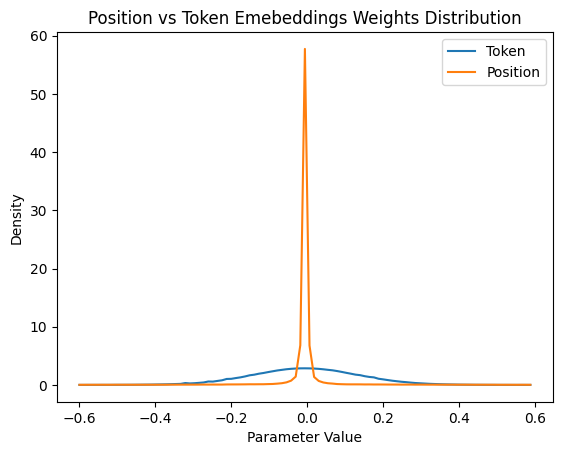

In [6]:
# Plot the probability density of the token weights vs positional weights
bins = np.linspace(-.6, .6, 100)

yE, xE = np.histogram(model.transformer.wte.weight.detach().numpy().flatten(), bins=bins, density=True)
yP, xP = np.histogram(model.transformer.wpe.weight.detach().numpy().flatten(), bins=bins, density=True)

plt.plot(xE[:-1], yE, '-',label="Token")
plt.plot(xP[:-1], yP, '-',label="Position")
plt.gca().set(xlabel='Parameter Value', ylabel='Density', title='Position vs Token Emebeddings Weights Distribution')
plt.legend()
plt.show()

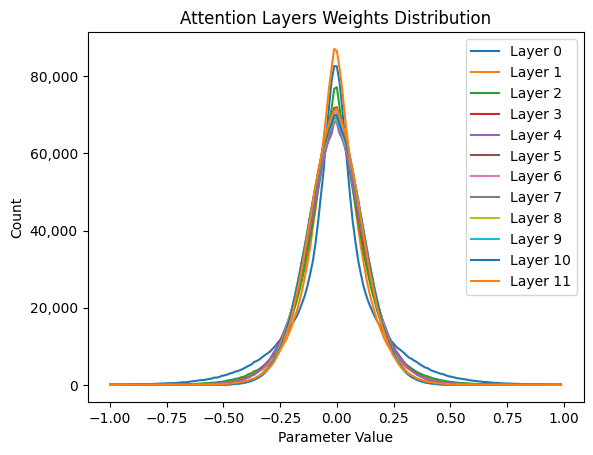

In [16]:
# Distribution of attention layers
from matplotlib.ticker import StrMethodFormatter


bins = np.linspace(-1,1,171)

for idx in range(len(model.transformer.h)):
  y, x = np.histogram(model.transformer.h[idx].attn.c_attn.weight.detach().numpy().flatten(), bins=bins)
  plt.plot(x[:-1], y, label=f"Layer {idx}")

plt.gca().set(xlabel='Parameter Value', ylabel='Count', title='Attention Layers Weights Distribution')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # Format y-axis labels with commas
plt.legend()
plt.show()

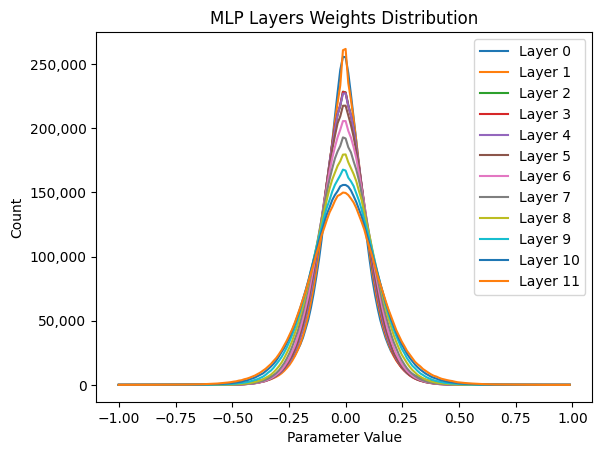

In [21]:
# Distribution of MLP layers
from matplotlib.ticker import StrMethodFormatter

for idx in range(len(model.transformer.h)):
  # Flatten each weight tensor before concatenating
  allMLP = torch.cat([model.transformer.h[idx].mlp.c_fc.weight.flatten(), model.transformer.h[idx].mlp.c_proj.weight.flatten()])
  y, x = np.histogram(allMLP.detach().numpy().flatten(), bins=bins)
  plt.plot(x[:-1], y, label=f"Layer {idx}")

plt.gca().set(xlabel='Parameter Value', ylabel='Count', title='MLP Layers Weights Distribution')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # Format y-axis labels with commas
plt.legend()
plt.show()

In [22]:
model.transformer

GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D(nf=2304, nx=768)
        (c_proj): Conv1D(nf=768, nx=768)
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D(nf=3072, nx=768)
        (c_proj): Conv1D(nf=768, nx=3072)
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)